# **AIML Module Project - Computer Vision 1** - Total Score 60

## Lakshman Kumar S

# Part A - 30 Marks

**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo. 

**• DATA DESCRIPTION:** The dataset comprises of images from 12 plant species. 
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.

**• PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo.

### Steps and tasks: [ Total Score: 30 Marks]

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

#### 1. Import and Understand the data [12 Marks]


##### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
##### Hint: You can extract it Manually by losing 2 marks.


In [2]:
images_folder = "plant-seedlings-classification.zip"

In [3]:
from zipfile import ZipFile
with ZipFile(images_folder,'r') as zip:
  zip.extractall()

##### B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
##### Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..

In [4]:
import glob

# specify the train folder
train_folder = "plant-seedlings-classification/train"

# get a list of all the image files in the train folder
image_files = glob.glob(train_folder + "/*/*.png")


In [6]:
len(image_files)

4750

In [7]:
import os
import cv2

dataset = 'plant-seedlings-classification/train'
X_data = []
y = []
labels = []

# list all folders inside train directory
for i in os.listdir(dataset):
    if i!= '.DS_Store':   #Specific to Mac
      print(i)
      labels.append(i)        
      for j in os.listdir(os.path.join(dataset, i)):
        # read each image inside train directory one by one
        dummy = cv2.imread(os.path.join(dataset, i, j))
        X_data.append(dummy)
        y.append(i)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [8]:
# Check number of images in each folder/category
for category in labels:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train_folder, category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 385 images


In [9]:
print(len(X_data), len(y), len(labels))

4750 4750 12


There are totally 4750 plant species in the given dataset with 12 classes

In [10]:
# create a DataFrame with the image file names, labels, and images
df = pd.DataFrame({"Name of Image": image_files, "Species": y, "Actual Image": X_data})


In [11]:
df['Name of Image'][0]

'plant-seedlings-classification/train\\Black-grass\\0050f38b3.png'

In [12]:
df['Name of Image'] = df['Name of Image'].str.split('\\', n=0).str.get(-1)

In [13]:
df.head()

Name of Image      Species  \
0  0050f38b3.png  Black-grass   
1  0183fdf68.png  Black-grass   
2  0260cffa8.png  Black-grass   
3  05eedce4d.png  Black-grass   
4  075d004bc.png  Black-grass   

                                        Actual Image  
0  [[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4...  
1  [[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4...  
2  [[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2...  
3  [[[51, 84, 108], [56, 89, 112], [54, 88, 110],...  
4  [[[165, 162, 162], [165, 161, 163], [160, 157,...

In [14]:
df["Name of Image"][0]

'0050f38b3.png'

In [15]:
df["Species"][0]

'Black-grass'

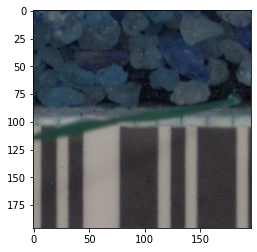

In [16]:
plt.imshow(df["Actual Image"][0])


##### C. Write a function that will select n random images and display images along with its species. [4 Marks]
##### Hint: If input for function is 5, it should print 5 random images along with its labels.


In [17]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
def random_images(n):
    import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
    import numpy as np
    rand = np.random.randint(0, len(X_data), n) # Generating 10 random numbers out of total number of plant species
    print(rand)
    plt.figure(figsize=(20, 20))
    for i,j in enumerate(rand):
        plt.subplot(1, len(rand), i+1)
        plt.imshow(X_data[j])  # greens, reds, blues, rgb
        plt.title("{}".format(y[j]))
        plt.axis('off')
    plt.show()


[ 235 3980  905 2763 2895]


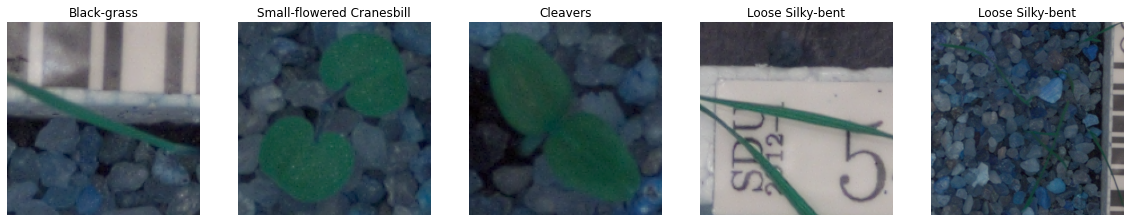

In [18]:
#Let's fetch 5 random images along with its labels 
random_images(5)

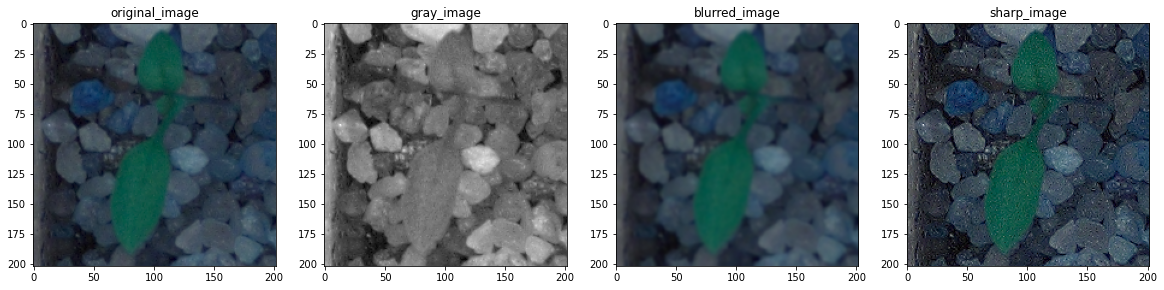

In [19]:
# Plotting a random image in different ways (gray, blur and sharp)
import random

# Original Image
img_org = random.choice(X_data)

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

#### 2. Data preprocessing [8 Marks]


##### A. Create X & Y from the DataFrame. [2 Marks]


In [20]:
X = df["Actual Image"]
y = df["Species"]

print(X.shape, y.shape)

(4750,) (4750,)


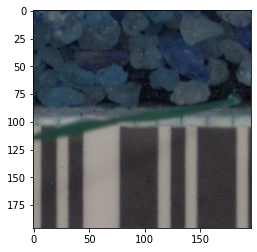

In [21]:
plt.imshow(X[0])

##### B. Encode labels of the images. [2 Marks]


In [22]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder

# Create class instance
le = LabelEncoder()
le.fit(y)
encoded_labels = le.transform(y)

# Create class instance
y_NN = pd.get_dummies(encoded_labels) #Data type: Number to Binary

# Display encoded variable
y_NN

0   1   2   3   4   5   6   7   8   9   10  11
0      1   0   0   0   0   0   0   0   0   0   0   0
1      1   0   0   0   0   0   0   0   0   0   0   0
2      1   0   0   0   0   0   0   0   0   0   0   0
3      1   0   0   0   0   0   0   0   0   0   0   0
4      1   0   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
4745   0   0   0   0   0   0   0   0   0   0   0   1
4746   0   0   0   0   0   0   0   0   0   0   0   1
4747   0   0   0   0   0   0   0   0   0   0   0   1
4748   0   0   0   0   0   0   0   0   0   0   0   1
4749   0   0   0   0   0   0   0   0   0   0   0   1

[4750 rows x 12 columns]

In [23]:
y_NN.shape

(4750, 12)

In [24]:
print("First 5 lables as one-hot encoded vectors:\n", y_NN[:5])

First 5 lables as one-hot encoded vectors:
    0   1   2   3   4   5   6   7   8   9   10  11
0   1   0   0   0   0   0   0   0   0   0   0   0
1   1   0   0   0   0   0   0   0   0   0   0   0
2   1   0   0   0   0   0   0   0   0   0   0   0
3   1   0   0   0   0   0   0   0   0   0   0   0
4   1   0   0   0   0   0   0   0   0   0   0   0


##### C. Unify shape of all the images. [2 Marks]


In [25]:
# Display shape of images present in the dataset
for i in range(1,len(X)):
    print(print(X[i].shape))

(388, 388, 3)
None
(886, 886, 3)
None
(117, 117, 3)
None
(471, 471, 3)
None
(1074, 1074, 3)
None
(251, 251, 3)
None
(1899, 1900, 3)
None
(531, 531, 3)
None
(352, 352, 3)
None
(1782, 1836, 3)
None
(531, 531, 3)
None
(1328, 1328, 3)
None
(354, 354, 3)
None
(586, 586, 3)
None
(1417, 1417, 3)
None
(351, 351, 3)
None
(961, 961, 3)
None
(753, 753, 3)
None
(630, 630, 3)
None
(711, 711, 3)
None
(1571, 1571, 3)
None
(2474, 2474, 3)
None
(650, 650, 3)
None
(511, 511, 3)
None
(247, 247, 3)
None
(143, 143, 3)
None
(110, 110, 3)
None
(1718, 1949, 3)
None
(368, 368, 3)
None
(588, 588, 3)
None
(945, 945, 3)
None
(521, 521, 3)
None
(700, 700, 3)
None
(468, 468, 3)
None
(641, 641, 3)
None
(685, 685, 3)
None
(1074, 1074, 3)
None
(93, 93, 3)
None
(1440, 1440, 3)
None
(288, 288, 3)
None
(603, 603, 3)
None
(800, 800, 3)
None
(170, 170, 3)
None
(135, 135, 3)
None
(93, 93, 3)
None
(603, 603, 3)
None
(733, 733, 3)
None
(400, 400, 3)
None
(170, 170, 3)
None
(1149, 1150, 3)
None
(940, 940, 3)
None
(1044, 1044, 

None
(578, 578, 3)
None
(120, 120, 3)
None
(612, 612, 3)
None
(514, 514, 3)
None
(122, 122, 3)
None
(569, 569, 3)
None
(496, 496, 3)
None
(584, 584, 3)
None
(354, 354, 3)
None
(524, 524, 3)
None
(756, 756, 3)
None
(181, 181, 3)
None
(138, 138, 3)
None
(679, 679, 3)
None
(710, 710, 3)
None
(494, 494, 3)
None
(120, 120, 3)
None
(575, 575, 3)
None
(800, 800, 3)
None
(578, 578, 3)
None
(622, 622, 3)
None
(932, 932, 3)
None
(904, 904, 3)
None
(581, 581, 3)
None
(785, 785, 3)
None
(931, 931, 3)
None
(578, 578, 3)
None
(842, 842, 3)
None
(356, 356, 3)
None
(700, 700, 3)
None
(103, 103, 3)
None
(450, 450, 3)
None
(99, 99, 3)
None
(1114, 1114, 3)
None
(647, 647, 3)
None
(439, 439, 3)
None
(144, 144, 3)
None
(360, 360, 3)
None
(578, 578, 3)
None
(968, 968, 3)
None
(104, 104, 3)
None
(174, 174, 3)
None
(845, 845, 3)
None
(165, 165, 3)
None
(527, 527, 3)
None
(77, 77, 3)
None
(1000, 1000, 3)
None
(123, 123, 3)
None
(114, 114, 3)
None
(1045, 1045, 3)
None
(124, 124, 3)
None
(735, 735, 3)
None
(786,

None
(108, 108, 3)
None
(86, 86, 3)
None
(627, 627, 3)
None
(358, 358, 3)
None
(125, 125, 3)
None
(70, 70, 3)
None
(108, 108, 3)
None
(57, 57, 3)
None
(83, 83, 3)
None
(74, 74, 3)
None
(131, 131, 3)
None
(137, 137, 3)
None
(587, 587, 3)
None
(93, 93, 3)
None
(456, 456, 3)
None
(95, 95, 3)
None
(146, 146, 3)
None
(653, 653, 3)
None
(99, 99, 3)
None
(70, 70, 3)
None
(575, 575, 3)
None
(126, 126, 3)
None
(107, 107, 3)
None
(182, 182, 3)
None
(58, 58, 3)
None
(164, 164, 3)
None
(136, 136, 3)
None
(65, 65, 3)
None
(94, 94, 3)
None
(84, 84, 3)
None
(703, 703, 3)
None
(506, 506, 3)
None
(51, 51, 3)
None
(96, 96, 3)
None
(135, 135, 3)
None
(653, 653, 3)
None
(80, 80, 3)
None
(127, 127, 3)
None
(96, 96, 3)
None
(141, 141, 3)
None
(469, 469, 3)
None
(611, 611, 3)
None
(121, 121, 3)
None
(351, 351, 3)
None
(71, 71, 3)
None
(176, 176, 3)
None
(144, 144, 3)
None
(118, 118, 3)
None
(73, 73, 3)
None
(74, 74, 3)
None
(52, 52, 3)
None
(105, 105, 3)
None
(64, 64, 3)
None
(162, 162, 3)
None
(509, 509, 3)

None
(100, 100, 3)
None
(152, 152, 3)
None
(162, 162, 3)
None
(741, 741, 3)
None
(647, 647, 3)
None
(586, 586, 3)
None
(420, 420, 3)
None
(729, 729, 3)
None
(271, 271, 3)
None
(659, 659, 3)
None
(376, 376, 3)
None
(234, 234, 3)
None
(471, 471, 3)
None
(424, 424, 3)
None
(150, 150, 3)
None
(608, 608, 3)
None
(174, 174, 3)
None
(595, 595, 3)
None
(222, 222, 3)
None
(247, 247, 3)
None
(402, 402, 3)
None
(115, 115, 3)
None
(283, 283, 3)
None
(173, 173, 3)
None
(165, 165, 3)
None
(434, 434, 3)
None
(400, 400, 3)
None
(111, 111, 3)
None
(639, 639, 3)
None
(552, 552, 3)
None
(225, 225, 3)
None
(374, 374, 3)
None
(150, 150, 3)
None
(275, 275, 3)
None
(145, 145, 3)
None
(273, 273, 3)
None
(198, 198, 3)
None
(377, 377, 3)
None
(434, 434, 3)
None
(119, 119, 3)
None
(376, 376, 3)
None
(157, 157, 3)
None
(157, 157, 3)
None
(289, 289, 3)
None
(154, 154, 3)
None
(666, 666, 3)
None
(182, 182, 3)
None
(748, 748, 3)
None
(1006, 1006, 3)
None
(343, 343, 3)
None
(493, 493, 3)
None
(201, 201, 3)
None
(359,

In [26]:
# The images have a different shape. Hence they need to be unified for modelling.
X_new = []

for img in image_files:
    # Read and resize image
    full_size_image = cv2.imread(img)
    X_new.append(cv2.resize(full_size_image, (128,128), interpolation=cv2.INTER_CUBIC))

# Display shape of variable X
for i in range(1,len(X_new)):
    print(print(X_new[i].shape))

(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3

None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 1

(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3

(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3)
None
(128, 128, 3

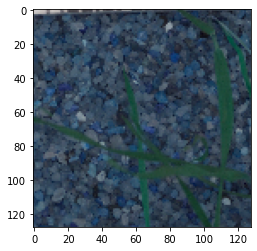

In [27]:
plt.imshow(X_new[20]);

##### D. Normalise all the images. [2 Marks]


Data Shape after Normalising (4750, 128, 128, 3) (4750, 12)


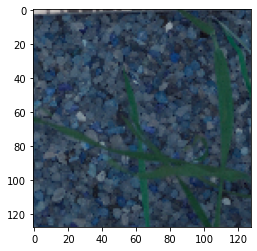

In [28]:
# Convert list to array
X_new = np.asarray(X_new)

# Perform Normalization
X_new = X_new / 255

print('Data Shape after Normalising', X_new.shape, y_NN.shape)

plt.imshow(X_new[20]);

#### 3. Model training [10 Marks]
##### Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.


##### A. Split the data into train and test data. [2 Marks]


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_NN, test_size=0.2, random_state=42, stratify=y)


In [30]:
print(f"Shapes of Train & Test sets are: {X_train.shape},{X_test.shape}")

print(f"Shapes of Train & Test sets of Target are: {y_train.shape},{y_test.shape}")

Shapes of Train & Test sets are: (3800, 128, 128, 3),(950, 128, 128, 3)
Shapes of Train & Test sets of Target are: (3800, 12),(950, 12)


##### B. Create new CNN architecture to train the model. [4 Marks]


In [31]:
### define model

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend


backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
    


In [32]:
# Initialising the CNN classifier
classifier_1 = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier_1.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier_1.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier_1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier_1.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier_1.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier_1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier_1.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier_1.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.4
classifier_1.add(Dropout(0.4))


# Adding a fully connected layer with 128 neurons
classifier_1.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier_1.add(Dense(units = 12, activation = 'softmax'))

classifier_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

##### C. Train the model on train data and validate on test data. [2 Marks]


In [33]:
# Compile model
classifier_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

import time
start_time = time.time()

# Fit the model
histroy = classifier_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=8, verbose=1)

print("****** %s seconds" % (time.time() - start_time))

Epoch 1/25
475/475 [==============================] - 91s 191ms/step - loss: 2.1689 - accuracy: 0.2484 - val_loss: 1.5670 - val_accuracy: 0.4789
Epoch 2/25
475/475 [==============================] - 90s 189ms/step - loss: 1.4575 - accuracy: 0.4929 - val_loss: 1.1884 - val_accuracy: 0.5989
Epoch 3/25
475/475 [==============================] - 92s 193ms/step - loss: 1.0665 - accuracy: 0.6305 - val_loss: 0.8910 - val_accuracy: 0.6937
Epoch 4/25
475/475 [==============================] - 91s 191ms/step - loss: 0.7739 - accuracy: 0.7268 - val_loss: 0.8282 - val_accuracy: 0.7242
Epoch 5/25
475/475 [==============================] - 89s 188ms/step - loss: 0.6031 - accuracy: 0.7882 - val_loss: 0.7493 - val_accuracy: 0.7558
Epoch 6/25
475/475 [==============================] - 87s 183ms/step - loss: 0.4752 - accuracy: 0.8232 - val_loss: 0.7454 - val_accuracy: 0.7663
Epoch 7/25
475/475 [==============================] - 84s 177ms/step - loss: 0.3829 - accuracy: 0.8666 - val_loss: 0.8405 - val_ac

Text(0.5, 1.0, 'Training and validation loss')

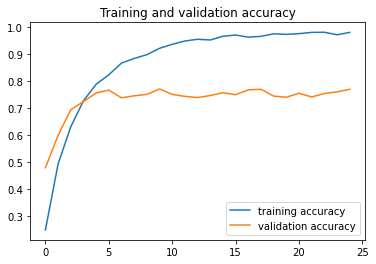

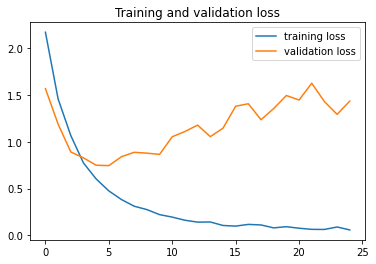

In [34]:
## Accuracy and Loss plots

accuracy      = histroy.history['accuracy']
val_accuracy  = histroy.history['val_accuracy']
loss     = histroy.history['loss']
val_loss = histroy.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [35]:
cnn_loss, cnn_accuracy = classifier_1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

30/30 [==============================] - 4s 129ms/step - loss: 1.4339 - accuracy: 0.7695
Test loss: 1.4339468479156494
Test accuracy: 0.769473671913147


##### D. Select a random image and print actual label and predicted label for the same. [2 Marks]

labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Softmax Outputs: [[5.9259557e-14 2.7581280e-05 6.5747705e-09 3.6018871e-05 3.3423861e-11
  9.1487857e-09 4.7356375e-17 1.2936365e-06 3.8220758e-05 9.9989581e-01
  1.1143351e-06 2.2504966e-10]]
Sum of Softmax Results: 1.0


Predicted_Label: Shepherds Purse
Actual Label: Shepherds Purse




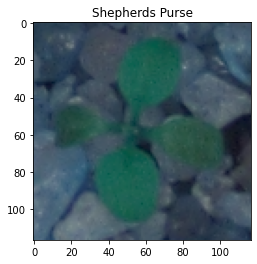

In [36]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

temp = df.sample(1)
print('labels:', labels)
plt.title(temp.iloc[0,1])
plt.imshow(temp.iloc[0,2])

test_image = cv2.resize(temp.iloc[0,2],(128,128))
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255

y_pred = classifier_1.predict(test_image)
print("Softmax Outputs:", y_pred)
print("Sum of Softmax Results:",y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])
            print('Actual Label:',temp.iloc[0,1])
            print('\n')
            plt.show()

labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Softmax Outputs: [[2.1085664e-06 5.1852078e-09 6.7717410e-06 3.7482905e-06 4.3847686e-07
  9.7316537e-05 9.9222320e-01 5.8474096e-05 7.0226123e-03 1.5608652e-10
  5.1121122e-05 5.3423812e-04]]
Sum of Softmax Results: 1.0000001


Predicted_Label: Loose Silky-bent
Actual Label: Black-grass




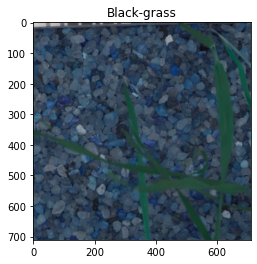

In [37]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 20

temp = pd.DataFrame(df.iloc[n]).T
print('labels:', labels)
plt.title(temp.iloc[0,1])
plt.imshow(temp.iloc[0,2])

test_image = cv2.resize(temp.iloc[0,2],(128,128))
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255

y_pred = classifier_1.predict(test_image)
print("Softmax Outputs:", y_pred)
print("Sum of Softmax Results:",y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])
            print('Actual Label:',temp.iloc[0,1])
            print('\n')
            plt.show()

labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
Softmax Outputs: [[9.9998915e-01 2.8693866e-12 2.7970336e-11 4.3323439e-08 3.2054838e-06
  1.2800674e-11 7.5611410e-06 1.2589113e-09 1.2334726e-08 1.9371796e-14
  1.0634998e-09 1.2414995e-07]]
Sum of Softmax Results: 1.0000001


Predicted_Label: Black-grass
Actual Label: Black-grass




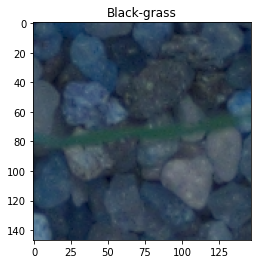

In [38]:
# Predicting and vizualizing the test image

import matplotlib.pyplot as plt
%matplotlib inline

n = 200

temp = pd.DataFrame(df.iloc[n]).T
print('labels:', labels)
plt.title(temp.iloc[0,1])
plt.imshow(temp.iloc[0,2])

test_image = cv2.resize(temp.iloc[0,2],(128,128))
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255

y_pred = classifier_1.predict(test_image)
print("Softmax Outputs:", y_pred)
print("Sum of Softmax Results:",y_pred.sum())


# Convert the predicted probabilities to labels

for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])
            print('Actual Label:',temp.iloc[0,1])
            print('\n')
            plt.show()

# Part B - 30 Marks

**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.

**• PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.

### Steps and tasks: [ Total Score: 30 Marks]

#### 1. Import and Understand the data [5 Marks]


##### A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]
##### Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
##### It can be loaded using: x, y = oxflower17.load_data() 


In [39]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [40]:
x, y = oxflower17.load_data()

##### B. Print Number of images and shape of the images. [1 Marks]

In [41]:
print("The Total number of Images in x is", len(x), "and in y is", len(y))

The Total number of Images in x is 1360 and in y is 1360


In [42]:
print("The Shape of the Image is", x.shape[1:])

The Shape of the Image is (224, 224, 3)


There are 1360 images in the dataset.

Shape of the images are given above.

Each image is 224x224 with 3 channels.

##### C. Print count of each class from y. [2 Marks]


In [43]:
import numpy as np

no_class = np.unique(y)
print("List of classes:" , no_class)

print("Total Number of classes:" ,len(no_class))

class_cnt = np.bincount(y)

print("Count of Each Classes:",class_cnt)


# dictionary of lists 
dict = {'List of classes': no_class, 'Count of Each Classes': class_cnt} 
    
df_count = pd.DataFrame(dict)

df_count

List of classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Total Number of classes: 17
Count of Each Classes: [80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80 80]


List of classes  Count of Each Classes
0                 0                     80
1                 1                     80
2                 2                     80
3                 3                     80
4                 4                     80
5                 5                     80
6                 6                     80
7                 7                     80
8                 8                     80
9                 9                     80
10               10                     80
11               11                     80
12               12                     80
13               13                     80
14               14                     80
15               15                     80
16               16                     80

Each class has 80 count of occurrences. Thus the classes are balanced.

#### 2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]


##### A. Display 5 random images. [1 Marks]


[ 464 1246  630  824 1287]


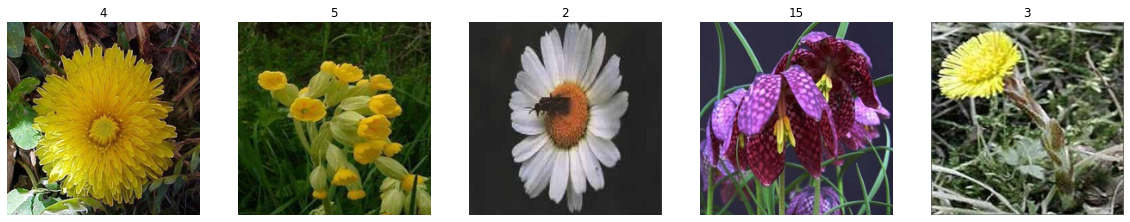

In [44]:
# visualizing the random images in the dataset along with their labels

# VISUALIZATION
import matplotlib.pyplot as plt # MATPLOTLIB FOR PLOTTING
import numpy as np
rand = np.random.randint(0, len(x), 5) # Generating 5 random numbers out of total number of flowers
print(rand)
plt.figure(figsize=(20, 20))
for i,j in enumerate(rand):
    plt.subplot(1, len(rand), i+1)
    plt.imshow(x[j])  # greens, reds, blues, rgb
    plt.title("{}".format(y[j]))
    plt.axis('off')
plt.show()

##### B. Select any image from the dataset and assign it to a variable. [1 Marks]


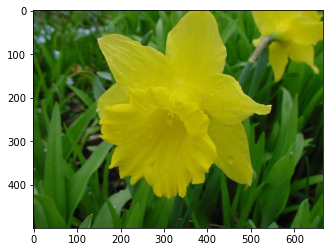

In [45]:
# Import Library
import skimage.io as io

# Read the image
img = io.imread('17flowers\\jpg\\0\\image_0012.jpg')

plt.imshow(img)
plt.show()

In [46]:
import random

# Original Image
img_org = random.choice(x)

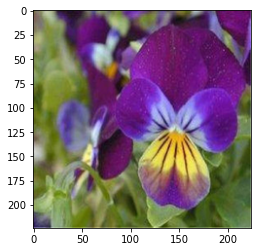

In [47]:
plt.imshow(img_org)

##### C. Transform the image into grayscale format and display the same. [3 Marks]


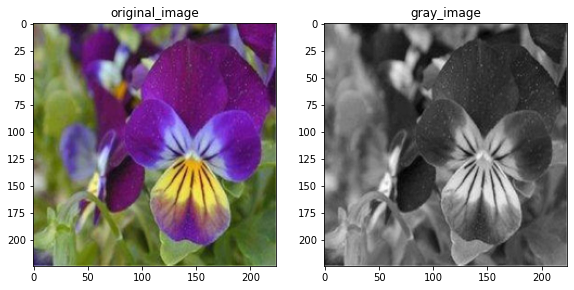

In [48]:
import os
import cv2

# Gray Image
gray_image = cv2.cvtColor(img_org, cv2.COLOR_RGB2GRAY)


img_title = ['original_image', 'gray_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

##### D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


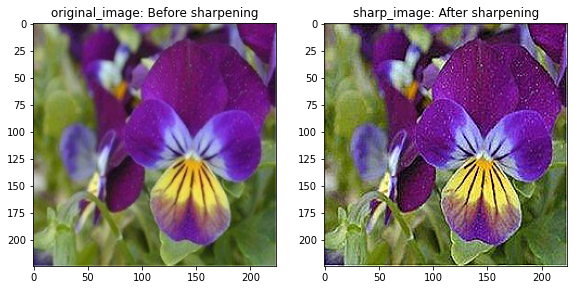

In [49]:
# Sharp Image
sharp_filter = np.array([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]])

sharp_img = cv2.filter2D(img_org,kernel=sharp_filter,ddepth=-1)

img_title = ['original_image: Before sharpening', 'sharp_image: After sharpening']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

##### E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]


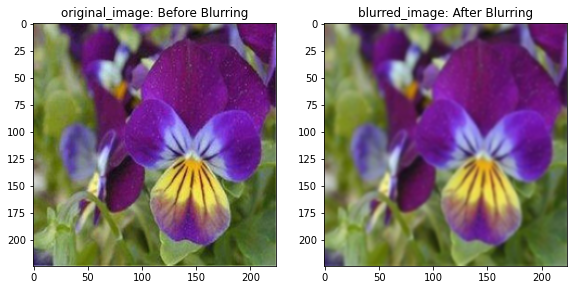

In [50]:

# Blur Image
blur_img = cv2.GaussianBlur(img_org,ksize=(5,5),sigmaX=0,sigmaY=0)

img_title = ['original_image: Before Blurring', 'blurred_image: After Blurring']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, blur_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

##### F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


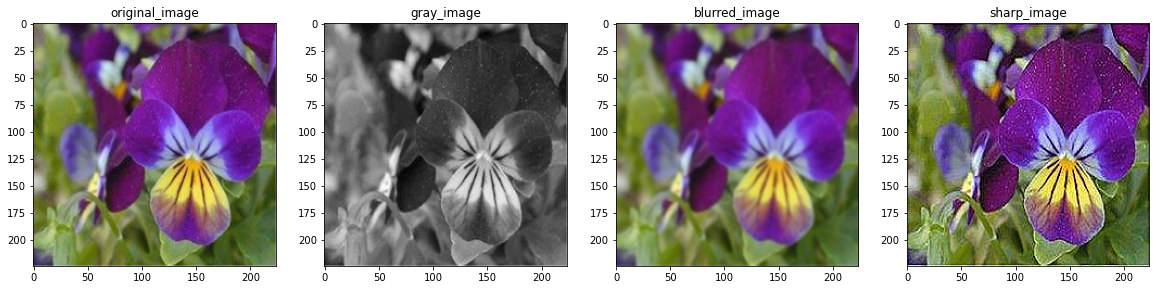

In [51]:
img_title = ['original_image', 'gray_image', 'blurred_image', 'sharp_image']

plt.figure(figsize=(20,20))
for i,img in enumerate([img_org, gray_image, blur_img, sharp_img]):
    plt.subplot(1,4,i+1)
    plt.title(img_title[i])
    plt.imshow(img,cmap='gray')

#### 3. Model training and Tuning: [15 Marks]


##### A. Split the data into train and test with 80:20 proportion. [2 Marks]


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
print('Train_Shape:', X_train.shape, y_train.shape)
print('Test_Shape:', X_test.shape, y_test.shape)

Train_Shape: (1088, 224, 224, 3) (1088,)
Test_Shape: (272, 224, 224, 3) (272,)


In [54]:
# Perform Normalization
x_train = X_train/255.0
x_test = X_test/255.0

# Reshaping to 2D Array for Supervised Learning
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))
x_train2

array([[1.2610535e-03, 2.0299887e-03, 6.9204153e-04, ..., 2.3068051e-04,
        2.1530181e-04, 2.9219533e-04],
       [6.1514809e-05, 1.5378702e-05, 2.6143793e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6916571e-03, 1.7685506e-03, 9.3810074e-04, ..., 2.0761248e-03,
        1.7531719e-03, 9.0734335e-04],
       ...,
       [6.1514805e-04, 6.6128414e-04, 3.9984621e-04, ..., 1.5993848e-03,
        1.8762015e-03, 7.0742023e-04],
       [3.9215689e-03, 3.9215689e-03, 3.9215689e-03, ..., 3.9215689e-03,
        3.9215689e-03, 3.9215689e-03],
       [1.8608228e-03, 1.0457517e-03, 4.4598232e-04, ..., 2.7681663e-04,
        1.8454441e-04, 2.4605924e-04]], dtype=float32)

In [55]:
# Reshaping test set
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))
x_test2

array([[5.8439065e-04, 1.3840831e-03, 2.1530183e-03, ..., 1.9377163e-03,
        2.3068052e-03, 1.1380239e-03],
       [2.5990005e-03, 2.4144561e-03, 2.1683970e-03, ..., 2.6143793e-04,
        2.4605924e-04, 1.6916571e-04],
       [3.9984621e-04, 4.1522493e-04, 2.9219533e-04, ..., 9.2272203e-05,
        1.6916571e-04, 6.1514809e-05],
       ...,
       [3.0757402e-04, 4.4598232e-04, 0.0000000e+00, ..., 4.1522493e-04,
        2.7681663e-04, 2.9219533e-04],
       [7.5355632e-04, 9.3810074e-04, 1.2302962e-04, ..., 1.1072665e-03,
        9.2272204e-04, 6.3052675e-04],
       [1.6147635e-03, 1.7531719e-03, 4.7673972e-04, ..., 1.2610535e-03,
        1.8608228e-03, 1.8454441e-04]], dtype=float32)

##### B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]


In [56]:
# NB - Find the best NBs kernels

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

k=[BernoulliNB,GaussianNB]
for i in range (len(k)):
    NB_Classifier = k[i]()
    NB_Classifier.fit(x_train2, y_train)
    print ('kernel is =',k[i], '\tScore=',NB_Classifier.score(x_test2, y_test))

kernel is = <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.16544117647058823
kernel is = <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.39338235294117646


In [57]:
# NB - Model - Gaussian NB is used as per the result from the above code

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

NB = GaussianNB()
NB.fit(x_train2, y_train)

y_pred_tr_NB = NB.predict(x_train2)
NB_Accuracy_Train=accuracy_score(y_train, y_pred_tr_NB)
print("Train Accuracy: ", NB_Accuracy_Train)

y_pred_ts_NB = NB.predict(x_test2)
NB_Accuracy_Test=accuracy_score(y_test, y_pred_ts_NB, normalize = True)
print("Test Accuracy : ", NB_Accuracy_Test)

Train Accuracy:  0.5211397058823529
Test Accuracy :  0.39338235294117646


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification report
print(classification_report(y_pred_ts_NB,y_test))

              precision    recall  f1-score   support

           0       0.31      0.71      0.43         7
           1       0.12      0.17      0.14        12
           2       0.81      0.57      0.67        23
           3       0.19      0.43      0.26         7
           4       0.75      0.28      0.41        43
           5       0.44      0.33      0.38        21
           6       0.00      0.00      0.00         3
           7       0.38      0.46      0.41        13
           8       0.44      0.88      0.58         8
           9       0.56      0.35      0.43        26
          10       0.38      0.35      0.36        17
          11       0.31      0.42      0.36        12
          12       0.38      0.40      0.39        15
          13       0.38      0.67      0.48         9
          14       0.19      0.20      0.19        15
          15       0.38      0.25      0.30        24
          16       0.69      0.65      0.67        17

    accuracy              

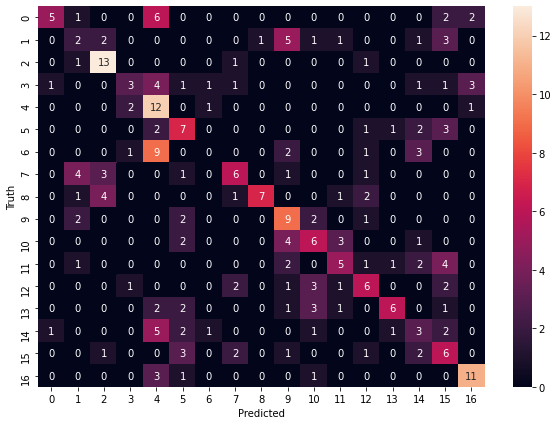

In [59]:
cm=confusion_matrix(y_test, y_pred_ts_NB)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [60]:
# RANDOM FOREST

# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=5)
model_RF.fit(x_train2, y_train)

# Accuracy
pred_RF = model_RF.predict(x_test2)
RF_Train = model_RF.score(x_train2, y_train)
RF_Test = accuracy_score(y_test, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 0.7693014705882353
Test Accuracy: 0.3639705882352941


In [61]:
# Classification report
print(classification_report(pred_RF,y_test))

              precision    recall  f1-score   support

           0       0.25      0.44      0.32         9
           1       0.12      0.20      0.15        10
           2       0.75      0.60      0.67        20
           3       0.31      0.38      0.34        13
           4       0.75      0.31      0.44        39
           5       0.19      0.23      0.21        13
           6       0.19      0.33      0.24         9
           7       0.44      0.54      0.48        13
           8       0.44      0.50      0.47        14
           9       0.25      0.22      0.24        18
          10       0.31      0.16      0.21        32
          11       0.25      0.33      0.29        12
          12       0.50      0.53      0.52        15
          13       0.19      0.30      0.23        10
          14       0.19      0.33      0.24         9
          15       0.25      0.31      0.28        13
          16       0.81      0.57      0.67        23

    accuracy              

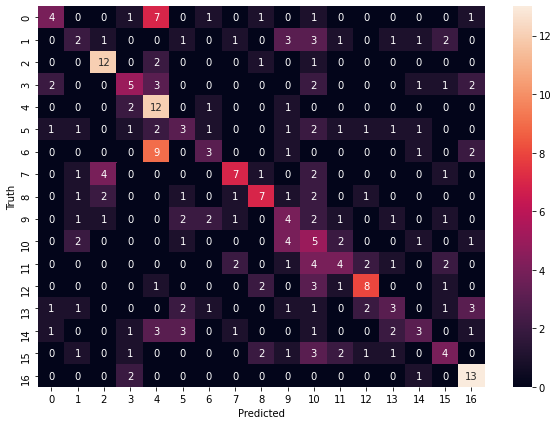

In [62]:
cm=confusion_matrix(y_test, pred_RF)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

##### C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]


In [63]:
# Convert target variable
# Import Library
from sklearn.preprocessing import LabelBinarizer

# Create class for encoding
enc = LabelBinarizer()

# Fit & Transform the training target variable
y_train2 = enc.fit_transform(y_train)

# Display the newly encoded target class of training variable
y_train2[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [64]:
# Fit & Transform the test target variable
y_test2 = enc.transform(y_test)

# Display the newly encoded target class of training variable
y_test2[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [65]:
### define model

import tensorflow as tf
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, Flatten

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
image_size = 224*224*3

# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# create model
model_b_1 = Sequential()  

model_b_1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_shape=(150528,)))
model_b_1.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dropout(0.5))
model_b_1.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model_b_1.add(Dropout(0.2))
model_b_1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

model_b_1.add(Dense(len(no_class), activation='softmax')) ### For multiclass classification Softmax is used 

model_b_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
## Looking into our base model
model_b_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               38535424  
_________________________________________________________________
dense_1 (Dense)              (None, 160)               41120     
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 224)               36064     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               57600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3

In [67]:
import time
start_time = time.time()

history = model_b_1.fit(x_train2, 
                  y_train2, 
                  epochs = 10, 
                  validation_data = (x_test2,y_test2),
                  batch_size = 32)

print("****** %s seconds" % (time.time() - start_time))

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 2.8880 - acc: 0.0570WARNING:tensorflow:From C:\Users\laksh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
1088/1088 [==============================] - 5s 5ms/sample - loss: 2.8880 - acc: 0.0570 - val_loss: 2.7987 - val_acc: 0.1103
Epoch 2/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 2.7649 - acc: 0.0800 - val_loss: 2.5350 - val_acc: 0.1287
Epoch 3/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 2.4432 - acc: 0.1268 - val_loss: 2.2651 - val_acc: 0.2059
Epoch 4/10
1088/1088 [==============================] - 5s 5ms/sample - loss: 2.2171 - acc: 0.1866 - val_l

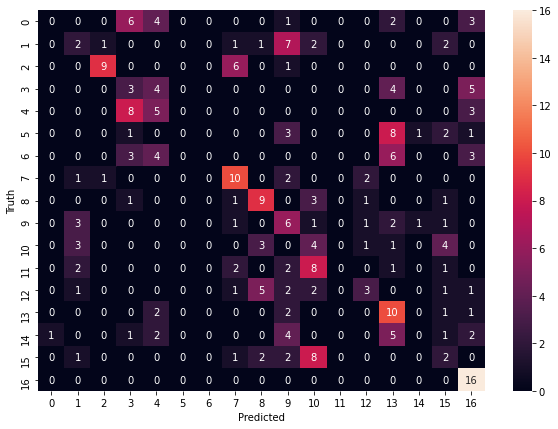

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.15      0.12      0.14        16
           2       0.82      0.56      0.67        16
           3       0.13      0.19      0.15        16
           4       0.24      0.31      0.27        16
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        16
           7       0.43      0.62      0.51        16
           8       0.45      0.56      0.50        16
           9       0.19      0.38      0.25        16
          10       0.14      0.25      0.18        16
          11       0.00      0.00      0.00        16
          12       0.38      0.19      0.25        16
          13       0.26      0.62      0.36        16
          14       0.00      0.00      0.00        16
          15       0.12      0.12      0.12        16
          16       0.46      1.00      0.63        16

    accuracy              

In [68]:

# Predict the whole generator to get predictions
#Y_pred = classifier.predict_generator(test_set, int(500/32+1))
Y_pred = model_b_1.predict(x_test2)
# Find out the predictions classes with maximum probability
y_pred = np.argmax(Y_pred, axis=1)

# Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Printing the classification report
print(classification_report(y_test, y_pred))

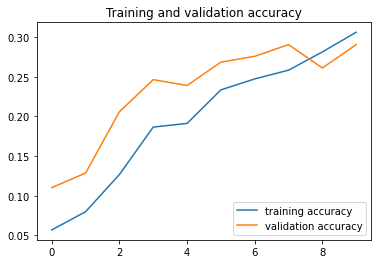

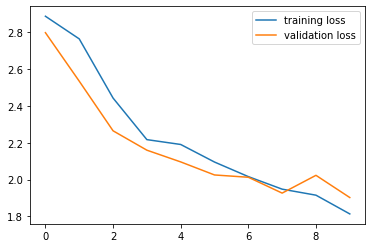

In [69]:
## Accuracy and Loss plots

import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')

Thus, the NN model gave a test accuracy of 29% and train accuracy of 30% at Epoch = 10

##### D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

In [71]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())
classifier.add(Dropout(0.75))

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout
classifier.add(Dropout(0.75))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 5 neuron to predict the categorical classifcation
classifier.add(Dense(units = 17, activation = 'softmax'))

In [72]:
#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)           

In [73]:
import time
start_time = time.time()

# Fit the model
histroy_cnn = classifier.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=8, verbose=1)

print("****** %s seconds" % (time.time() - start_time))

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 83s 76ms/sample - loss: 2.8000 - acc: 0.0763 - val_loss: 2.6092 - val_acc: 0.1066
Epoch 2/10
1088/1088 [==============================] - 85s 78ms/sample - loss: 2.5859 - acc: 0.1489 - val_loss: 2.4034 - val_acc: 0.1949
Epoch 3/10
1088/1088 [==============================] - 77s 71ms/sample - loss: 2.3699 - acc: 0.2040 - val_loss: 2.2628 - val_acc: 0.2243
Epoch 4/10
1088/1088 [==============================] - 77s 71ms/sample - loss: 2.2200 - acc: 0.2279 - val_loss: 1.9131 - val_acc: 0.3456
Epoch 5/10
1088/1088 [==============================] - 82s 75ms/sample - loss: 2.0437 - acc: 0.2895 - val_loss: 1.8369 - val_acc: 0.3529
Epoch 6/10
1088/1088 [==============================] - 85s 78ms/sample - loss: 1.9414 - acc: 0.3171 - val_loss: 1.7372 - val_acc: 0.3971
Epoch 7/10
1088/1088 [==============================] - 86s 79ms/sample - loss: 1.8309 - acc: 0.3676 - val_loss: 1.7055 - val

Text(0.5, 1.0, 'Training and validation loss')

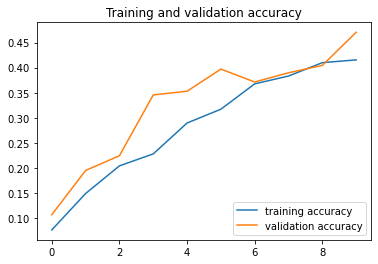

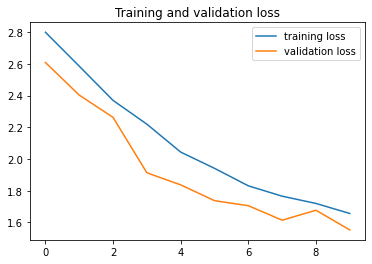

In [74]:
## Accuracy and Loss plots

accuracy_cnn      = histroy_cnn.history['acc']
val_accuracy_cnn  = histroy_cnn.history['val_acc']
loss_cnn     = histroy_cnn.history['loss']
val_loss_cnn = histroy_cnn.history['val_loss']

epochs   = range(len(accuracy_cnn)) # Get number of epochs

plt.plot  (epochs, accuracy_cnn, label = 'training accuracy')
plt.plot  (epochs, val_accuracy_cnn, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss_cnn, label = 'training loss')
plt.plot  (epochs, val_loss_cnn, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

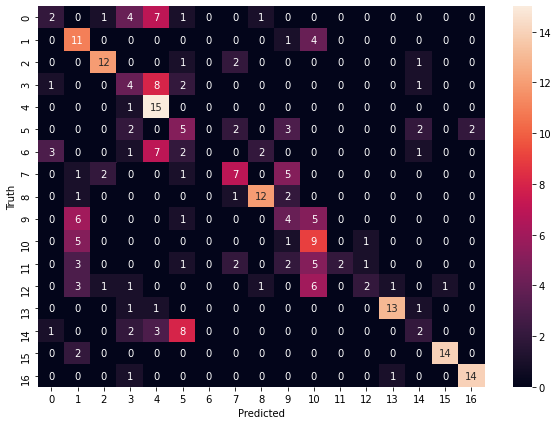

              precision    recall  f1-score   support

           0       0.29      0.12      0.17        16
           1       0.34      0.69      0.46        16
           2       0.75      0.75      0.75        16
           3       0.24      0.25      0.24        16
           4       0.37      0.94      0.53        16
           5       0.23      0.31      0.26        16
           6       0.00      0.00      0.00        16
           7       0.50      0.44      0.47        16
           8       0.75      0.75      0.75        16
           9       0.22      0.25      0.24        16
          10       0.31      0.56      0.40        16
          11       1.00      0.12      0.22        16
          12       0.50      0.12      0.20        16
          13       0.87      0.81      0.84        16
          14       0.25      0.12      0.17        16
          15       0.93      0.88      0.90        16
          16       0.88      0.88      0.88        16

    accuracy              

In [75]:

# Predict the whole generator to get predictions
#Y_pred = classifier.predict_generator(test_set, int(500/32+1))
Y_pred = classifier.predict(X_test)
# Find out the predictions classes with maximum probability
y_pred = np.argmax(Y_pred, axis=1)

# Utilities for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Printing the classification report
print(classification_report(y_test, y_pred))

## Inferences and Conclusion

- We used multiple models like Naive Bayes, Random Forest, Neural Network, CNN
- Let's compare the accuracy and executaion time.


Model    | Train Accuracy | Test Accuracy 
---------|----------------|---------------
NB       |      52%       |       40%     
RF       |      77%       |       37%     
NN       |      32%       |       29%     
CNN      |      42%       |       48%     






## Conclusion
- We can see the CNN model has the best accuracy in both test and train compared to the other models.
- It's a good practice to add a few dense layer on the base model
- The usage of appropriate optimiser, epcoh steps, no. are epochs make significant difference apart from model architecture.

##### E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

CNN is the best performing model, so using the CNN model to perdict the label for 'Prediction.jpg'

(224, 224, 3)
After expand_dims: (1, 224, 224, 3)
labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Softmax Outputs: [5.87739050e-04 3.16922337e-01 1.20976325e-02 2.89481715e-04
 7.12793480e-05 1.92642305e-03 9.40024620e-05 3.42503458e-01
 1.47369457e-02 1.61637202e-01 7.14663863e-02 4.69156392e-02
 1.92876365e-02 3.76298645e-04 2.27417448e-03 8.80595203e-03
 7.35173489e-06]
Sum of Softmax Outputs: 0.99999994


The Predicted class is : 7




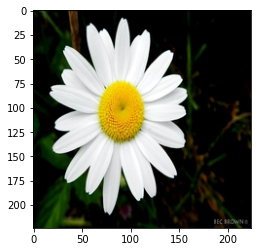

In [76]:
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
test_image = cv2.imread('Prediction.jpg')

image = mpimg.imread("Prediction.jpg")
plt.imshow(image)

# Resize the image to 224x224 shape to be compatible with the model
test_image = cv2.resize(test_image,(224,224))

# Check if the size of the Image array is compatible with Keras model
print(test_image.shape)

# If not compatible expand the dimensions to match with the Keras Input
test_image = np.expand_dims(test_image, axis = 0)
test_image =test_image*1/255.0

#Check the size of the Image array again
print('After expand_dims: '+ str(test_image.shape))

print('labels:', no_class)

result = classifier.predict(test_image)

print("Softmax Outputs:", result[0])
print("Sum of Softmax Outputs:", result[0].sum())

# Index of the class with maximum probability
predicted_index = np.argmax(result[0])

# Print the name of the class
print("\n")
print("The Predicted class is :", no_class[predicted_index])
print("\n")

plt.show()
